# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

In [ ]:
import pandas as pd

# Define the data with Member labels, ensuring hours are integers
data = {
    'First Name': ['Musad Rafiouddin', 'Sushant Samir', 'Venkata Prasanna Kumar', 'Prince'],
    'Last Name': ['Saiyed', 'Khedekar', 'Gurugubelli', 'Ifem'],
    'Signature (Full Name, Date)': ['Musad Rafiouddin Saiyed', 'Sushant Samir Khedekar', 'Venkata Prasanna Kumar Gurugubelli', 'Prince Ifem'],
    'Hours': [4, 3, 3, 3],  # Use integer values for Hours
    'Contribution %': ['25%', '25%', '25%', '25%']
}

# Create DataFrame
df = pd.DataFrame(data)

# Set custom index to match "Member" labels
df.index = ['Member 1:', 'Member 2:', 'Member 3:', 'Member 4:']

# Display the DataFrame with style formatting
styled_df = df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
])

styled_df

,First Name,Last Name,"Signature (Full Name, Date)",Hours,Contribution %
Member 1:,Musad Rafiouddin,Saiyed,Musad Rafiouddin Saiyed,4,25%
Member 2:,Sushant Samir,Khedekar,Sushant Samir Khedekar,3,25%
Member 3:,Venkata Prasanna Kumar,Gurugubelli,Venkata Prasanna Kumar Gurugubelli,3,25%
Member 4:,Prince,Ifem,Prince Ifem,3,25%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

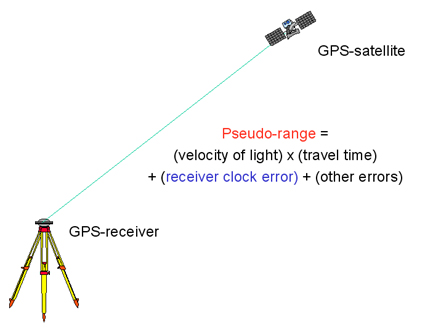

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment3/pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment3/satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size

Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

Step 0.5: Function that
computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):
    # Calculate the Euclidean norm (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis =1)
    return distance

### Step 1: Define the Cost Function (4 marks)
Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    distances = euclidean_norm(r_pos, s_pos)
    pred_pseudorange = distances + cdT
    residuals = pseudorange - pred_pseudorange
    sum_of_squared_residuals = np.sum(np.square(residuals))
    return sum_of_squared_residuals

### Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).


The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.


The function returns a 1D numpy array that contains 4 elements.


Call euclidean_norm function to calculate geometric distance.


In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    distance = euclidean_norm(r_pos, s_pos)
    residuals = pseudorange - (distance + cdT)

    # partial derivatives
    dL_dx = -2 * np.sum(residuals * (r_pos[0] - s_pos[:, 0]) / distance)
    dL_dy = -2 * np.sum(residuals * (r_pos[1] - s_pos[:, 1]) / distance)
    dL_dz = -2 * np.sum(residuals * (r_pos[2] - s_pos[:, 2]) / distance)
    dL_dcdT = -2 * np.sum(residuals)

    # gradient vector
    grad = np.array([dL_dx, dL_dy, dL_dz, dL_dcdT])

    return grad

### Step 3: Gradient Descent Implementation (4 marks)
Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function


In [ ]:
# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.01, max_iters=100000, tolerance=1e-6):

    global steps_count

    # Initialize the estimates as zeros
    X = np.array([0, 0, 0, 0])

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # Compute the cost in the current step
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)

        # Compute the gradients in the current step
        grad = gradient(r_pos, cdT, s_pos, pseudorange)
        # grad = np.clip(grad, -1e3, 1e3)

        # Update estimates
        X_new = X - learning_rate * grad

        # Compute the new cost
        new_cost = cost_function(X_new[:3], X_new[3], s_pos, pseudorange)

        # Break the loop if converged
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged!")
            steps_count = iteration
            break

        # Update the parameters for the next iteration
        X = X_new

        # Collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)
        arr_err.append(X[:3] - GroundTruth)

    return X

### Step 4: Parameters Optimization & Results Printing (3 marks)

Call *gradient_descent* function to optimize the estimating parameters using default optimization hyperparameters

Print:

*   optimized parameters
*   final position errors of receiver
*   number of steps taken for convergence
*   final cost value
*   final gradient values








In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params = gradient_descent(pseudorange, sat_pos)

# print the mentioned metrics
print(f'optimized parameters: {optimized_params}')
print(f'final position errors of receiver: {optimized_params[0:3] - GroundTruth}')
print(f'number of steps taken for convergence: {steps_count}')
print(f'final cost value: {cost_function(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)}')
print(f'final gradient values: {gradient(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)}')


Converged!
optimized parameters: [-1.63349244e+06 -3.65162953e+06  4.95248539e+06  6.44954762e+00]
final position errors of receiver: [-3.06252556 -2.346982    3.77353113]
number of steps taken for convergence: 2700
final cost value: 0.563436913173813
final gradient values: [ 0.00161511  0.00899931 -0.02765869 -0.0156805 ]


### Step 5: Cost vs Steps Plot & Analysis (2 marks)
Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

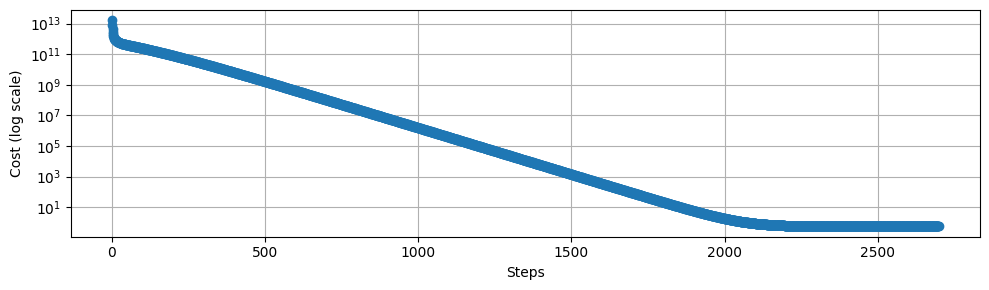

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
ax.semilogy(arr_cost, marker='o', label='Cost vs Steps')
ax.set_xlabel('Steps')
ax.set_ylabel('Cost (log scale)')
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# after 2000 steps the cost stops decreasing further, indicating that the algorithm has converged to a local minimum.

### Step 6: Gradients vs Steps & Analysis(2 marks)
Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

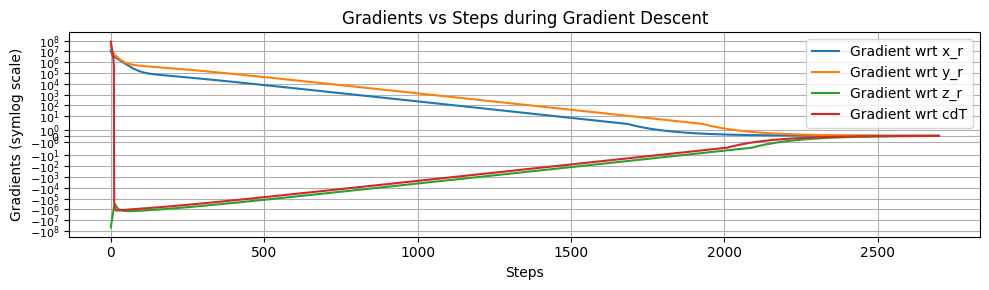

In [ ]:
arr_grad = np.array(arr_grad)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

steps = np.arange(len(arr_grad))
ax.plot(steps, arr_grad[:, 0], label='Gradient wrt x_r')
ax.plot(steps, arr_grad[:, 1], label='Gradient wrt y_r')
ax.plot(steps, arr_grad[:, 2], label='Gradient wrt z_r')
ax.plot(steps, arr_grad[:, 3], label='Gradient wrt cdT')

ax.set_yscale('symlog')
ax.set_xlabel('Steps')
ax.set_ylabel('Gradients (symlog scale)')
ax.set_title('Gradients vs Steps during Gradient Descent')

ax.tick_params(axis='y', labelsize=8)
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

# Comment on the pattern
# All the four gradients are gradually decreasing over the iterations meaning the algorithm is approaching minimum of cost function

### Step 7: Positioning errors vs Steps & Analysis(2 marks)
Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

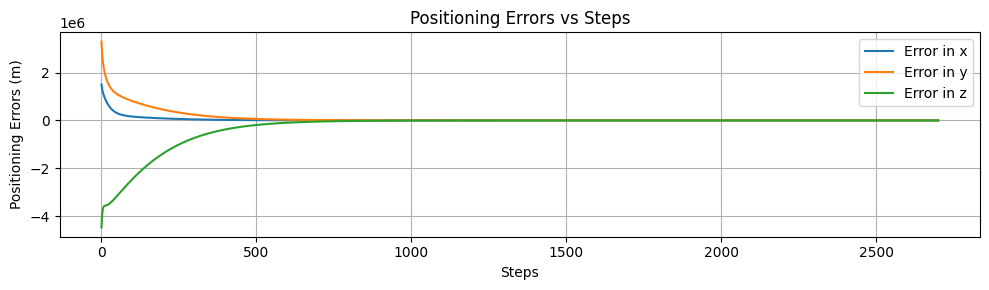

In [ ]:
arr_err_np = np.array(arr_err)

# Plot positioning errors vs steps
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

# for x
ax.plot(arr_err_np[:, 0], label='Error in x')
# for y
ax.plot(arr_err_np[:, 1], label='Error in y')
# for z
ax.plot(arr_err_np[:, 2], label='Error in z')

ax.set_xlabel('Steps')
ax.set_ylabel('Positioning Errors (m)')
ax.set_title('Positioning Errors vs Steps')
ax.legend()

ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# All the errors in three directions are decreasing indicating that algorithm is converging towards a solution

# Hyperparameters Tuning

### Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(*hint: you may need to adjust the maximum loop iterations in this case*)

In [ ]:
#set learning rate to 0.01
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_2 = gradient_descent(pseudorange, sat_pos, learning_rate=0.01, max_iters=3000)

# print the metrics
print(f'optimized parameters: {optimized_params_2}')
print(f'final position errors of receiver: {optimized_params_2[0:3] - GroundTruth}')
print(f'number of steps taken for convergence: {steps_count}')
print(f'final cost value: {arr_cost[-1]}')
print(f'final gradient values: {arr_grad[-1]}')

Converged!
optimized parameters: [-1.63349244e+06 -3.65162953e+06  4.95248539e+06  6.44954762e+00]
final position errors of receiver: [-3.06252556 -2.346982    3.77353113]
number of steps taken for convergence: 2700
final cost value: 0.5634379196310744
final gradient values: [ 0.00162646  0.00906259 -0.0278531  -0.01579068]


In [34]:
#set learning rate to 0.001
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_3 = gradient_descent(pseudorange, sat_pos, learning_rate=0.001, max_iters=30000)

# print the metrics
print(f'optimized parameters: {optimized_params_3}')
print(f'final position errors of receiver: {optimized_params_3[0:3] - GroundTruth}')
print(f'number of steps taken for convergence: {steps_count}')
print(f'final cost value: {arr_cost[-1]}')
print(f'final gradient values: {arr_grad[-1]}')

Converged!
optimized parameters: [-1.63349244e+06 -3.65162950e+06  4.95248531e+06  6.40077571e+00]
final position errors of receiver: [-3.05750202 -2.31899094  3.68750284]
number of steps taken for convergence: 25431
final cost value: 0.5640833056318891
final gradient values: [ 0.0051249   0.02855582 -0.08776402 -0.04975592]


## Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)



ANSWER HERE

---
1. With the **learning rate = 0.01** the algorith coverges with **2700 steps** while with **learning rate = 0.001** the algorithm converges with **25431 steps**. Although the final cost was same in both cases, as the learning rate was decreased the algorithm took more time to coverge.

2. LSE aims to minimize the sum of squared residuals by solving mathematical equations and Gradient Descend aims to minimize the cost function by taking
small steps propotional to gradient. If we have good initial guess for the receiver position LSE might give us faster and direct solution. But if the initial guess is far from the true position then, Grdaient Descent maybe a better but slower option. Also it requires tuning the hyperparameters, else it won't converge with too large or too low learning rate.

---

# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [36]:
!pip install ucimlrepo

In [37]:
from ucimlrepo import fetch_ucirepo

# Below code fetches dataset
phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# TO DO: display sizes of X and y (1 mark)
print("Size of X:", X.shape)
print("Size of y:", y.shape)


Size of X: (11055, 30)
Size of y: (11055, 1)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

class distribution of y:
 result
 1        6157
-1        4898
Name: count, dtype: int64


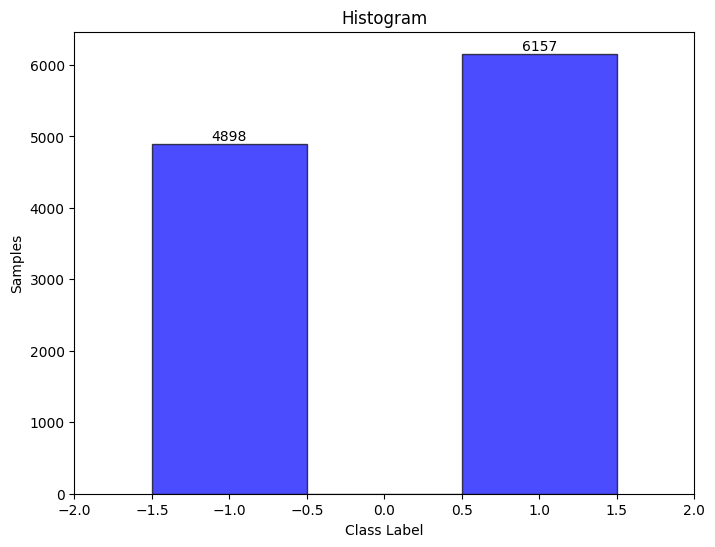

In [41]:
# TO DO: Check the class distribution of y (2 mark)
class_dist = y.value_counts()
print("class distribution of y:\n", class_dist)

# Display exact values for each bin in the histogram
plt.figure(figsize=(8, 6))

bins = [-1.5, -0.5, 0.5, 1.5]
plt.hist(y['result'], bins=bins, alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram')
plt.xlabel('Class Label')
plt.ylabel('Samples')
plt.xlim(-2,2)

plt.text(1, class_dist[1], str(class_dist[1]), ha='center', va='bottom')
plt.text(-1, class_dist[-1], str(class_dist[-1]), ha='center', va='bottom')

plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [42]:
# TO DO: Create a smaller dataset with 3% of the data
# TO DO: display sizes of X_small and y_small (2 mark)

from sklearn.model_selection import train_test_split
# TO DO: Create a smaller dataset with 3% of the data
X_small, X_test, y_small, y_test = train_test_split(X, y, train_size=0.03, random_state=42)

# TO DO: display sizes of X_small and y_small (2 mark)
print("X_small size:", X_small.shape)
print("y_small size:", y_small.shape)


X_small size: (331, 30)
y_small size: (331, 1)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

In [48]:
from sklearn.linear_model import LogisticRegression

# Convert y to a 1D array if needed
y = y.ravel()

# Instantiate the model
model = LogisticRegression(max_iter=2000)

# Implement the model with different datasets

# (a) X and y
model.fit(X, y)

# (b) Only first two columns of X and y
X_subset = X.iloc[:, :2]
model.fit(X_subset, y)

# (c) X_small and y_small
model.fit(X_small, y_small)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 marks)
5. testing accuracy (1 marks)
6. log loss (1 mark)

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information



### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 mark)
# Note: 70% training set, 30% testing set


In [ ]:
import seaborn as sns

# TO DO: Calculate confusion matrix (2 marks) : conf_mat

# Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
# TO DO: Print classification report (2 marks)


### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---
---